In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,8)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Read the Dataset

df = pd.read_csv('creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Data Reading 

In [3]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Total number of rows and columns
 
print("The shape of the dataset is :",df.shape)

The shape of the dataset is : (284807, 31)


In [5]:
# The unique values of the dependent variable

df.Class.unique()

array([0, 1])

- If class is 0, then it is a genuine transaction.
- If class is 1, then it is a fraud transaction.

In [6]:
# total null/missing value percentage in the data

pd.DataFrame(df.isnull().sum()/len(df)*100, columns=['Null%'])

,Null%
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


### Percentage of not fraud transaction

In [7]:
# calculating the genuine transaction

count = 0
for i in range(len(df)):
    
    if df.Class[i] == 0:
        count +=1

not_fraud_per = count/len(df.Class)*100
print("The percentage of not fraud transactions is :",not_fraud_per)

The percentage of not fraud transactions is : 99.82725143693798


### Percentage of fraud transaction

In [8]:
# calculating the fraud transaction

count = 0

for i in range(len(df)):
    
    if df.Class[i] == 1:
        count +=1

fraud_per = count/len(df.Class)*100       
print("The percentage of not fraud transactions is :",fraud_per)

The percentage of not fraud transactions is : 0.1727485630620034


### Visualisation

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


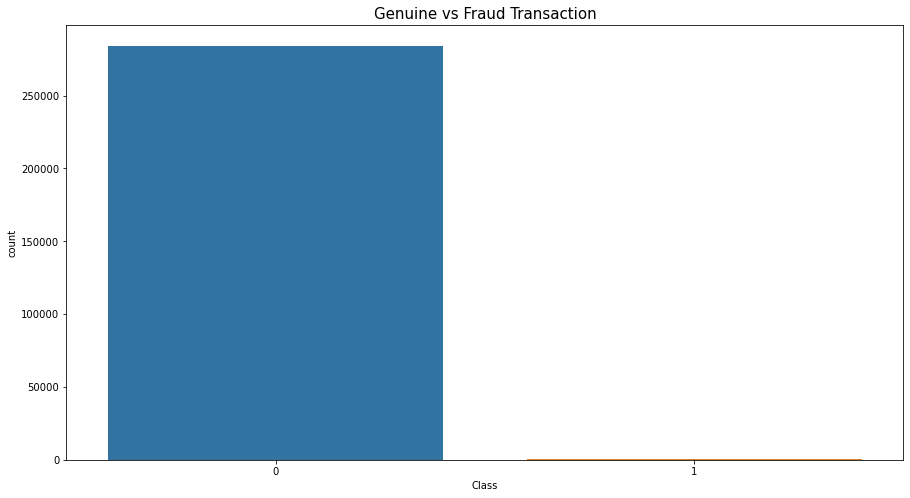

In [20]:
# plotting the count of the genuine and fraud transaction

sns.countplot(df.Class)
plt.title('Genuine vs Fraud Transaction',size=15)
plt.show()

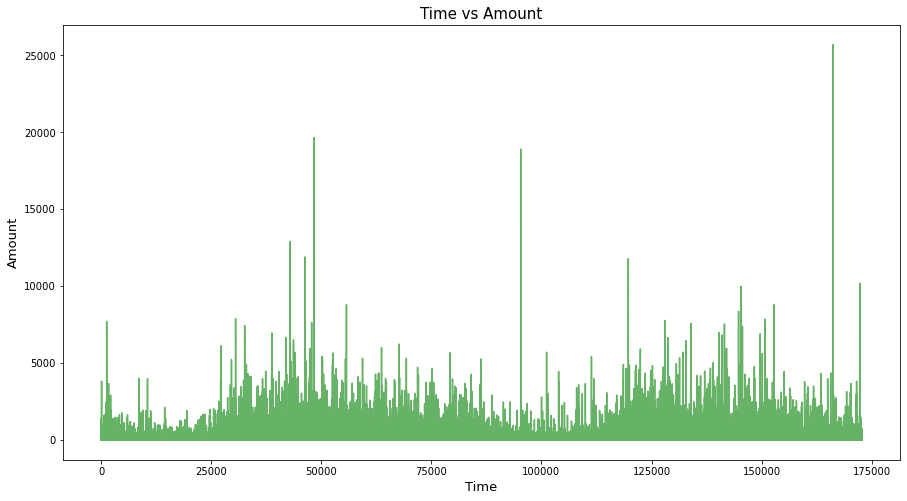

In [24]:
# plotting the graph between time and amount 

plt.plot(df.Time, df.Amount, color='green',alpha=0.6)
plt.xlabel('Time',size=13)
plt.ylabel('Amount',size=13)
plt.title('Time vs Amount',size=15)
plt.show()

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


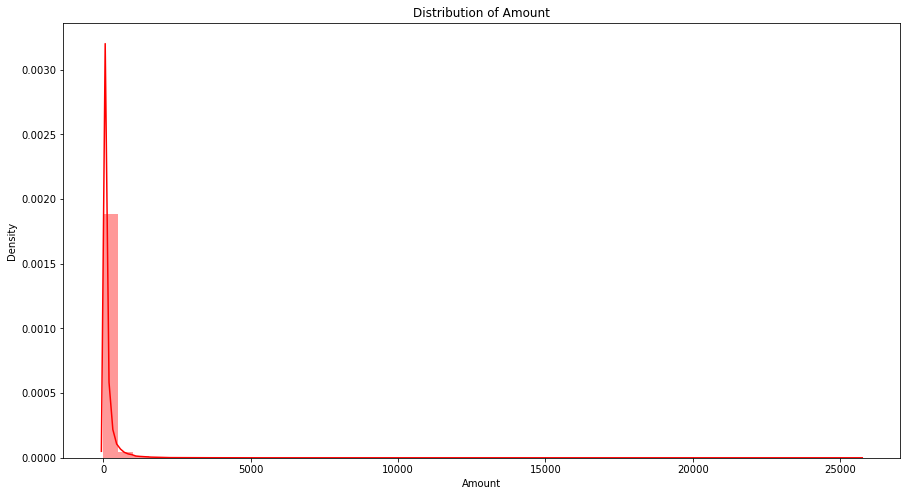

In [26]:
# plotting the distribution of amount

sns.distplot(df.Amount,color='red',)
plt.title('Distribution of Amount')
plt.show()

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


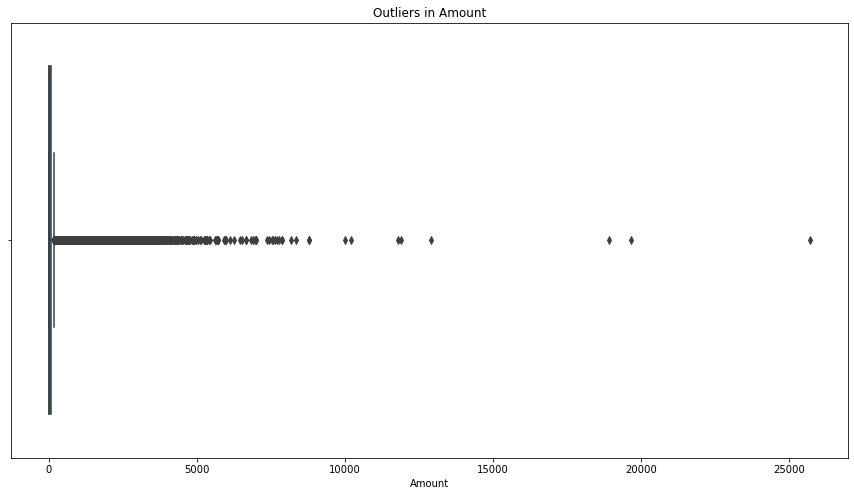

In [12]:
# identifying the outlier

sns.boxplot(df.Amount)
plt.title('Outliers in Amount')
plt.show()

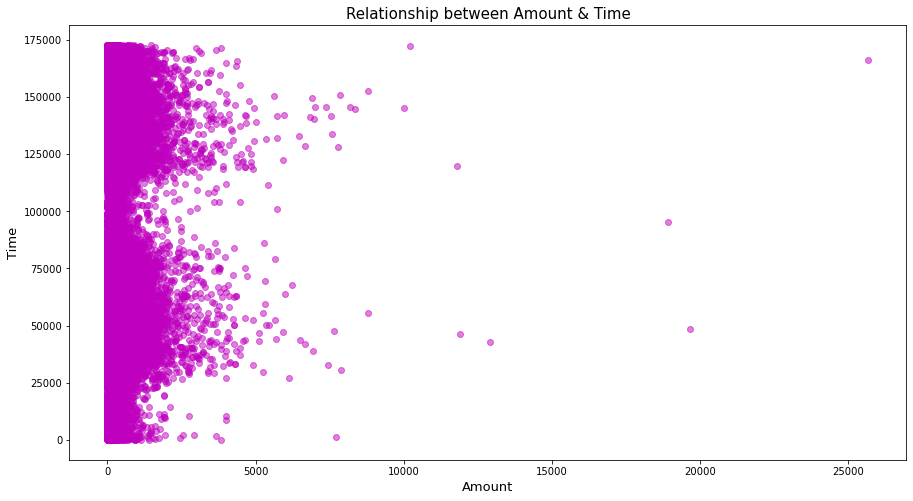

In [28]:
# plotting the relationship between time and amount

plt.scatter(df.Amount, df.Time, color='m', alpha=0.5)
plt.xlabel('Amount',size=13)
plt.ylabel('Time',size=13)
plt.title('Relationship between Amount & Time',size=15)
plt.show()

# Data pre-processing 

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


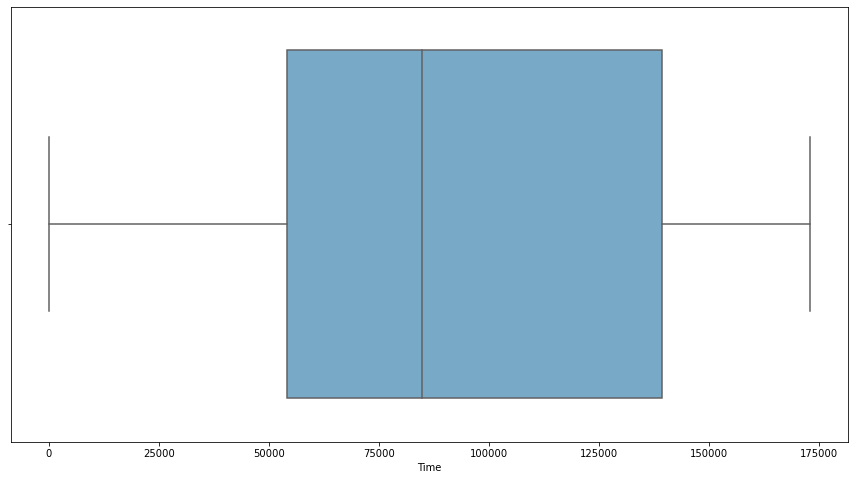

In [39]:
# outliers in time column

sns.boxplot(df_X.Time,orient='h', palette='Blues')
plt.show()

- There are no outlier in the feature.

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


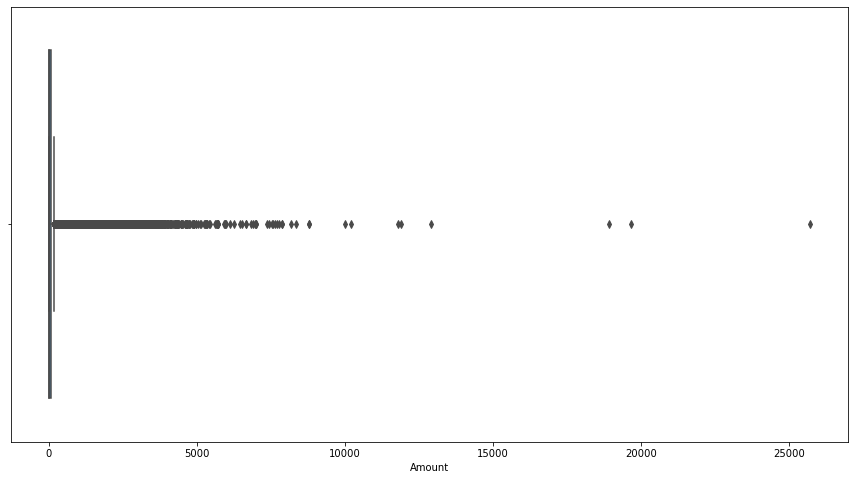

In [41]:
# outliers in time column

sns.boxplot(df_X.Amount,orient='h', palette='Blues_d')
plt.show()

In [81]:
# finding the ouliers using IQR method 

Q1=df.Amount.quantile(0.25)
Q3=df.Amount.quantile(0.75)
IQR=Q3-Q1
print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR :",IQR)
Lower_limit = Q1-1.5*IQR
Upper_limit = Q3+1.5*IQR
print("The lower limit is :",Lower_limit, "\nThe upper limit is :",Upper_limit)

Q1 : 5.6
Q3 : 77.1625
IQR : 71.5625
The lower limit is : -101.74375 
The upper limit is : 184.50625


In [83]:
# treating the outliers with upper limit

df.Amount = df[df.Amount< Upper_limit]

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


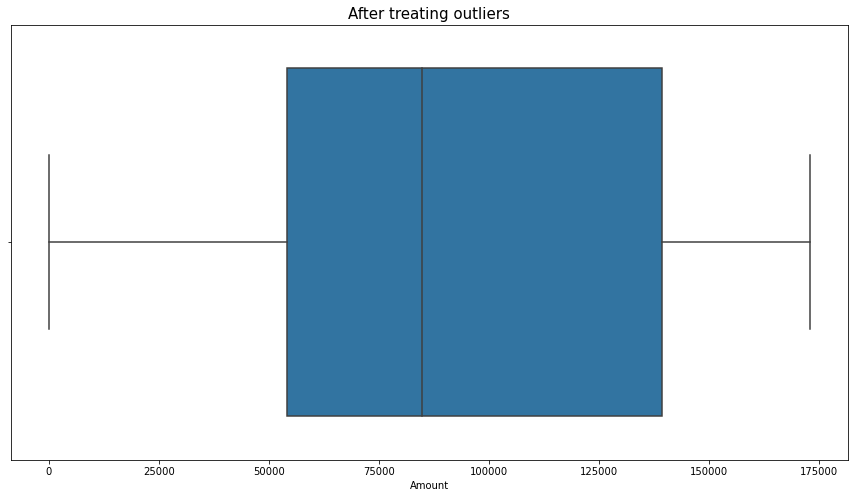

In [96]:
# plotting the data after treating the outlier

sns.boxplot(df.Amount)
plt.title('After treating outliers',size=15)
plt.show()

In [87]:
# independent variables

df_X = df[['Time','Amount']]

### Modelling 

- Split the data into X and y.
- Then split the data into train & test data.

In [88]:
# splitting the data into dependent and independent variables

X = df_X
y = df.Class

In [89]:
# splitting the data further into train and test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# assinging logistic regression algorithm

log_reg = LogisticRegression()

In [91]:
# fitting the train data 

log_reg.fit(X_train,y_train)

LogisticRegression()

In [92]:
# predicting with test data

y_test_pred = log_reg.predict(X_test) 

In [93]:
# measuring the accuracy of the model 

print("The accuracy of the model is :", round(accuracy_score(y_test,y_test_pred)*100,2),"%")

The accuracy of the model is : 99.84 %


- Thus our model is predicting the fraud transactions from the test data with the accuracy of 99%.